# WeatherPy (mine)

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" 
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
   # end_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    city_url = f"{url}q={city}&appid={weather_api_key}"
    #city__end_url = f"{url}q={city}&appid={weather_api_key}"
    #f"{url}/weather?q={city_data}&appid={API key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #city_weather = requests.get(end_url).json
        #weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | hayma'
City not found. Skipping...
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | greenwood
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | katsuura
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | colonia
Processing Record 13 of Set 1 | rongelap
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | bandiagara
Processing Record 16 of Set 1 | tazovsky
Processing Record 17 of Set 1 | hadibu
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | kenora
Processing Record 21 of Set 1 | nikolayevsk-on-amure
Processing Record 

Processing Record 37 of Set 4 | madang
Processing Record 38 of Set 4 | guasdualito
Processing Record 39 of Set 4 | kataragama
City not found. Skipping...
Processing Record 40 of Set 4 | broken hill
Processing Record 41 of Set 4 | kavaratti
Processing Record 42 of Set 4 | jayapura
Processing Record 43 of Set 4 | kingston
Processing Record 44 of Set 4 | ushuaia
Processing Record 45 of Set 4 | luderitz
Processing Record 46 of Set 4 | manuel ojinaga
City not found. Skipping...
Processing Record 47 of Set 4 | hendrina
Processing Record 48 of Set 4 | ola
Processing Record 49 of Set 4 | nouadhibou
Processing Record 0 of Set 5 | chegdomyn
Processing Record 1 of Set 5 | novaya igirma
Processing Record 2 of Set 5 | yagry
City not found. Skipping...
Processing Record 3 of Set 5 | aoulef
Processing Record 4 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 5 of Set 5 | flying fish cove
Processing Record 6 of Set 5 | klaipeda
Processing Record 7 of Set 5 | prado
Processing 

Processing Record 24 of Set 8 | kupang
Processing Record 25 of Set 8 | bandar abbas
Processing Record 26 of Set 8 | huilong
Processing Record 27 of Set 8 | pitimbu
Processing Record 28 of Set 8 | solleftea
Processing Record 29 of Set 8 | bengkulu
Processing Record 30 of Set 8 | gamba
Processing Record 31 of Set 8 | dapa
Processing Record 32 of Set 8 | balzar
Processing Record 33 of Set 8 | basoko
Processing Record 34 of Set 8 | yung shue wan
Processing Record 35 of Set 8 | wau
Processing Record 36 of Set 8 | chikitigarh
Processing Record 37 of Set 8 | san jose village
City not found. Skipping...
Processing Record 38 of Set 8 | moses lake
Processing Record 39 of Set 8 | vladikavkaz
Processing Record 40 of Set 8 | cromer
Processing Record 41 of Set 8 | pantai cenang
City not found. Skipping...
Processing Record 42 of Set 8 | newman
Processing Record 43 of Set 8 | umba
Processing Record 44 of Set 8 | el calafate
Processing Record 45 of Set 8 | itoman
Processing Record 46 of Set 8 | shenku

Processing Record 14 of Set 12 | cargados carajos
City not found. Skipping...
Processing Record 15 of Set 12 | aykhal
Processing Record 16 of Set 12 | crane
Processing Record 17 of Set 12 | al bawiti
Processing Record 18 of Set 12 | morehead city
Processing Record 19 of Set 12 | dalby
Processing Record 20 of Set 12 | bonny
Processing Record 21 of Set 12 | tangalle
Processing Record 22 of Set 12 | sile
Processing Record 23 of Set 12 | mirpur sakro
Processing Record 24 of Set 12 | gokwe
Processing Record 25 of Set 12 | sur
Processing Record 26 of Set 12 | touros
Processing Record 27 of Set 12 | saldanha
Processing Record 28 of Set 12 | ta`u
Processing Record 29 of Set 12 | tsengel
Processing Record 30 of Set 12 | aswan
Processing Record 31 of Set 12 | piripiri
Processing Record 32 of Set 12 | masuguru
Processing Record 33 of Set 12 | gurupi
Processing Record 34 of Set 12 | blackwater
Processing Record 35 of Set 12 | heide
Processing Record 36 of Set 12 | santiago de cao
Processing Record

In [38]:
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [39]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,278.20,44,100,1.54,CA,1683313504
1,lompoc,34.6391,-120.4579,291.92,70,82,3.58,US,1683313589
2,waitangi,-43.9535,-176.5597,288.05,96,100,0.89,NZ,1683313589
3,edinburgh of the seven seas,-37.0676,-12.3116,287.95,71,100,7.93,SH,1683313590
4,adamstown,-25.0660,-130.1015,296.28,75,100,8.68,PN,1683313590


In [41]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,278.20,44,100,1.54,CA,1683313504
1,lompoc,34.6391,-120.4579,291.92,70,82,3.58,US,1683313589
2,waitangi,-43.9535,-176.5597,288.05,96,100,0.89,NZ,1683313589
3,edinburgh of the seven seas,-37.0676,-12.3116,287.95,71,100,7.93,SH,1683313590
4,adamstown,-25.0660,-130.1015,296.28,75,100,8.68,PN,1683313590


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

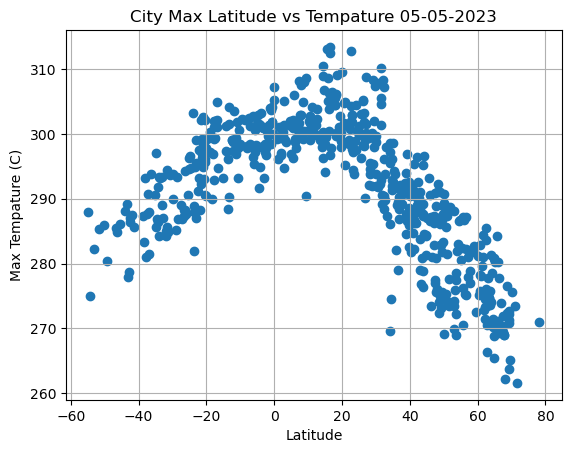

In [50]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# a
plt.title("City Max Latitude vs Tempature 05-05-2023")
plt.ylabel("Max Tempature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

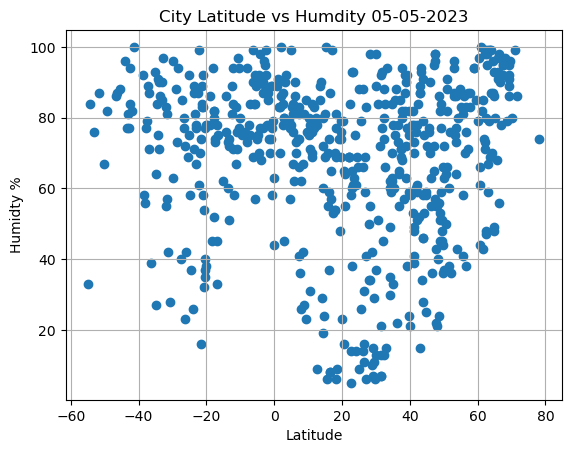

In [52]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# make graph properties
plt.title("City Latitude vs Humdity 05-05-2023")
plt.ylabel("Humidty %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

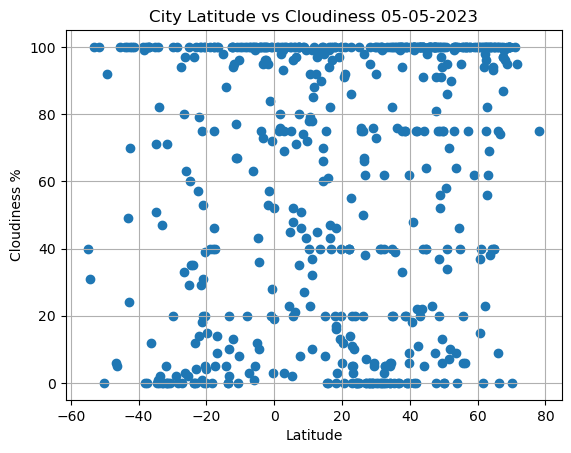

In [53]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# make graph properties
plt.title("City Latitude vs Cloudiness 05-05-2023")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

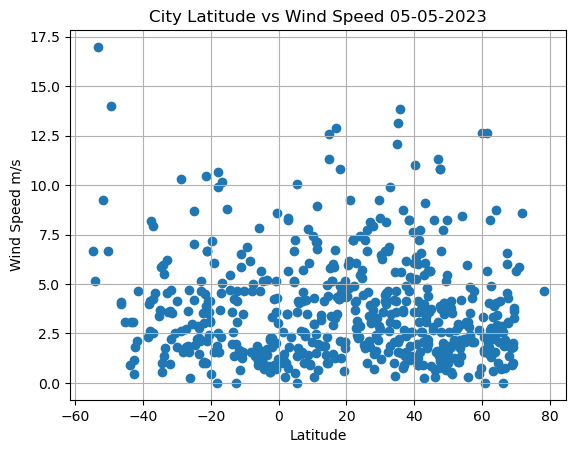

In [54]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# make graph properties
plt.title("City Latitude vs Wind Speed 05-05-2023")
plt.ylabel("Wind Speed m/s")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


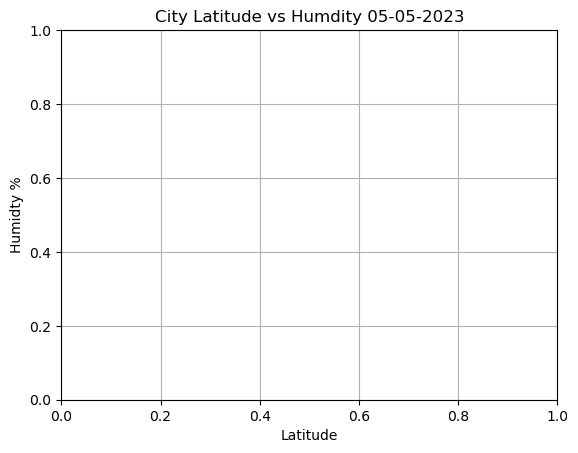

In [65]:
# Define a function to create Linear Regression plots (used the plot above with new parameters)

# make graph properties
plt.title("City Latitude vs Humdity 05-05-2023")
plt.ylabel("Humidty %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,278.20,44,100,1.54,CA,1683313504
1,lompoc,34.6391,-120.4579,291.92,70,82,3.58,US,1683313589
6,greenwood,34.1668,-82.1165,295.53,62,0,2.06,US,1683313591
7,yellowknife,62.4560,-114.3525,285.44,47,75,8.23,CA,1683313591
8,katsuura,35.1333,140.3000,292.56,78,100,13.15,JP,1683313591


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,288.05,96,100,0.89,NZ,1683313589
3,edinburgh of the seven seas,-37.0676,-12.3116,287.95,71,100,7.93,SH,1683313590
4,adamstown,-25.0660,-130.1015,296.28,75,100,8.68,PN,1683313590
5,port-aux-francais,-49.3500,70.2167,280.36,82,92,13.97,TF,1683313590
16,hermanus,-34.4187,19.2345,286.37,91,1,0.99,ZA,1683313593


###  Temperature vs. Latitude Linear Regression Plot

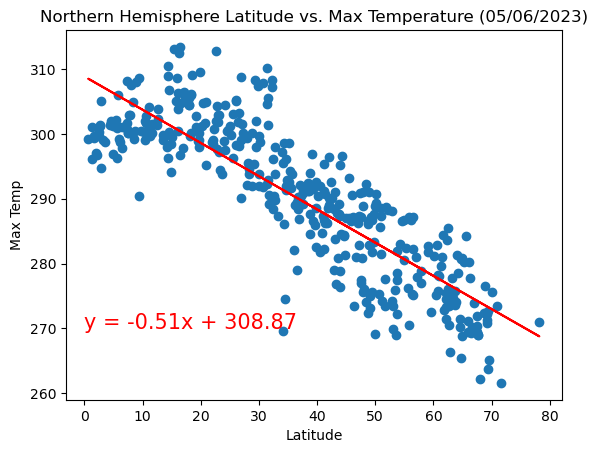

In [93]:
# Linear regression on Northern Hemisphere
northen_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# x and y values
x = northen_hemi_df["Lat"]
y = northen_hemi_df["Max Temp"]

# linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# regression line
regress_values = x * p_slope + p_int

# line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0,270), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere Latitude vs. Max Temperature (05/06/2023)")
plt.show()

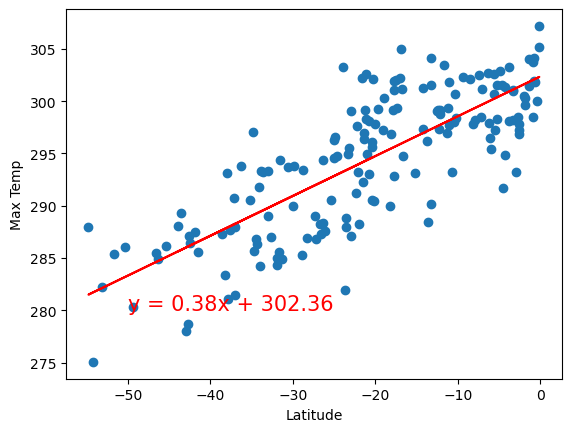

In [94]:
# Linear regression on Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

# linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# calculate regression line
regress_values = x * p_slope + p_int

# line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-50,280), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** The lineage is exacy tly as you would would expect for northern and southern output. The lineage on the northern starts high and goes lower as you get more northern as southern starts lower and grows the further you go south.

### Humidity vs. Latitude Linear Regression Plot

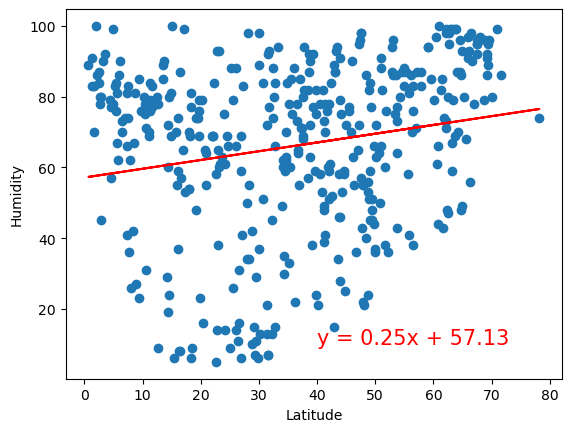

In [100]:
# Northern Hemisphere
northen_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# define x and y 
x = northen_hemi_df["Lat"]
y = northen_hemi_df["Humidity"]

# linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# calculate regression line
regress_values = x * p_slope + p_int

# line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

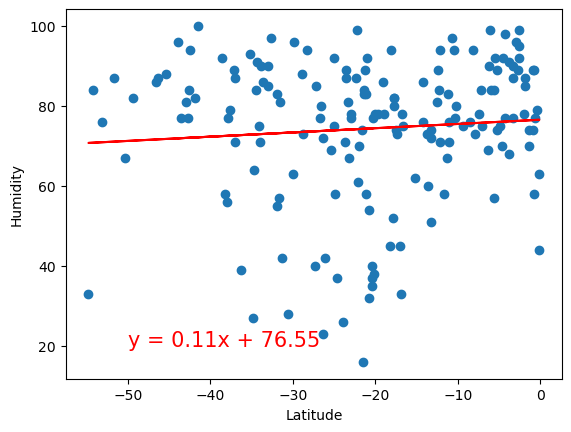

In [101]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

# linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# calculate regression line
regress_values = x * p_slope + p_int

# line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** Because the Latitude for the output on both hemispheres is running close to a straight line, it makes sense they are similiar in line generations.

### Cloudiness vs. Latitude Linear Regression Plot

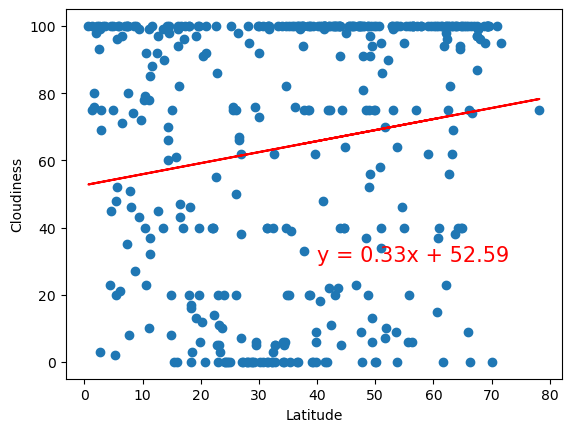

In [103]:
# Northern Hemisphere
northen_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# define x and y 
x = northen_hemi_df["Lat"]
y = northen_hemi_df["Cloudiness"]

# linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# calculate regression line
regress_values = x * p_slope + p_int

# line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# Create scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (40,30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

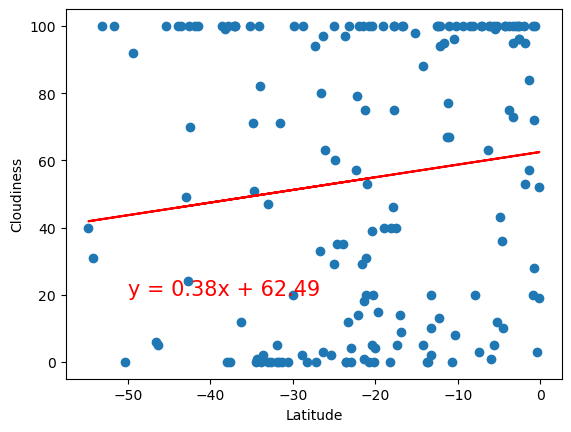

In [105]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

# linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# calculate regression line
regress_values = x * p_slope + p_int

# line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** The lineage shows it startes high on the northern hemisphere and as it goes down to the southers, the lineage is slowing decreasing correctly

### Wind Speed vs. Latitude Linear Regression Plot

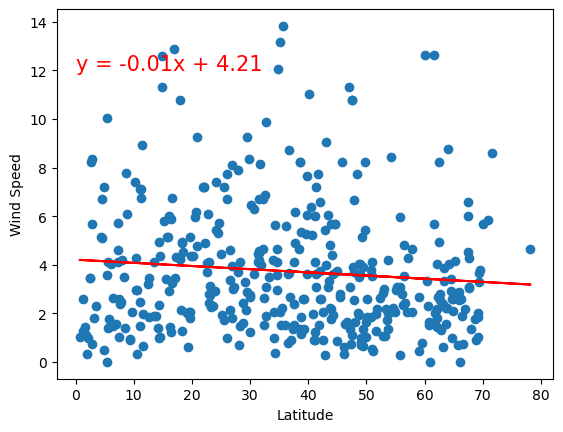

In [106]:
# Northern Hemisphere
northen_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# define x and y 
x = northen_hemi_df["Lat"]
y = northen_hemi_df["Wind Speed"]

# linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# calculate regression line
regress_values = x * p_slope + p_int

# line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# Create scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (0,12), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

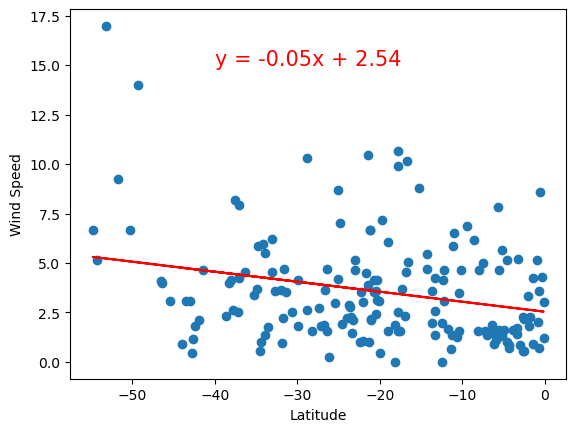

In [108]:
# Southern Hemisphere
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

# linear regression
(p_slope, p_int, p_r, p_v, p_std_err) = linregress(x, y)

# calculate regression line
regress_values = x * p_slope + p_int

# line equation string
line_eq = "y = " + str(round(p_slope,2)) + "x + " + str(round(p_int,2))

# scatter plot with linear regression
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (-40,15), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** The wind speed does not appear to have a large discrepency regardless of northern or southern hemisphere.